In [ ]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Circle

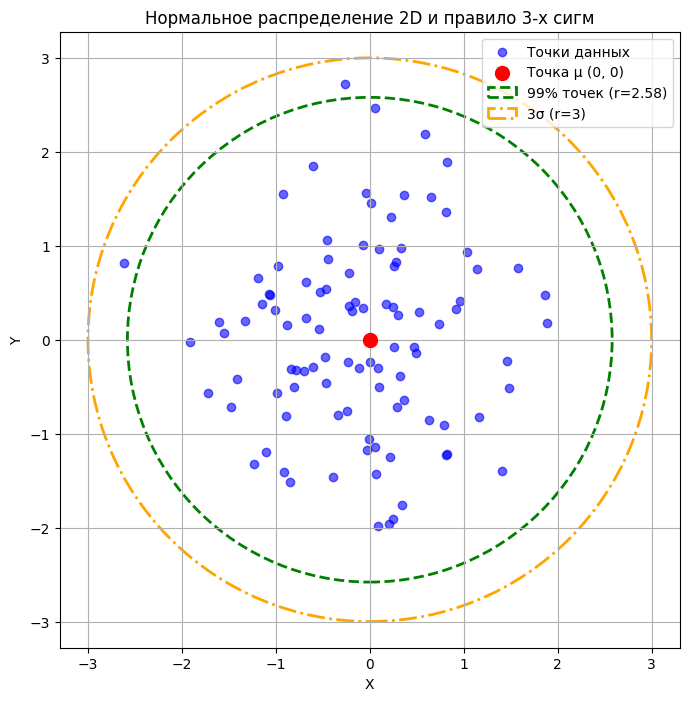

In [11]:
# Задание 1 (1 балл)
# Сгенерируйте массив нормально распределенных значений размерности 2 из 100 точек
# (выберите среднее значение μ и среднее квадратическое отклонение σ по своему выбору).
# Проверьте правило трех сигм: нарисуйте окружность с центром в точке μ с таким радиусом,
# чтобы на нее приходилось 0,99 всех точек, а также окружность радиусом 3 сигмы.
# Выделите точку μ отдельным цветом.

# Выбираем параметры для нормального распределения
mu_x, mu_y = 0, 0  # Средние значения
sigma = 1          # Стандартное отклонение
n_points = 100     # Количество точек

# Генерируем 2D нормально распределенные точки
np.random.seed(42)  # Для воспроизводимости
points = np.random.multivariate_normal([mu_x, mu_y], [[sigma, 0], [0, sigma]], n_points)

# Извлекаем координаты X и Y
x_coords = points[:, 0]
y_coords = points[:, 1]

# Рассчитываем радиусы для 99% точек и 3 сигм
# Для нормального распределения, 99% точек лежат внутри 2.576 сигм (~2.58)
radius_99 = 2.58 * sigma
radius_3sigma = 3 * sigma # согласно википедии для ~99,7% охвата по правилу 3 сигм

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(8, 8))

# Рисуем точки
ax.scatter(x_coords, y_coords, c='blue', alpha=0.6, label='Точки данных')

# Рисуем точку μ
ax.scatter(mu_x, mu_y, c='red', s=100, label=f'Точка μ ({mu_x}, {mu_y})', zorder=5)

# Рисуем окружность для 99%
circle_99 = Circle((mu_x, mu_y), radius_99, color='green', fill=False, linestyle='--', linewidth=2, label=f'99% точек (r={radius_99:.2f})')
ax.add_patch(circle_99)

# Рисуем окружность для 3-х сигм
circle_3sigma = Circle((mu_x, mu_y), radius_3sigma, color='orange', fill=False, linestyle='-.', linewidth=2, label=f'3σ (r={radius_3sigma})')
ax.add_patch(circle_3sigma)

# Настройки графика
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Нормальное распределение 2D и правило 3-х сигм')
ax.legend()
ax.grid(True)

plt.axis('equal')  # Для корректного отображения окружностей
plt.show()

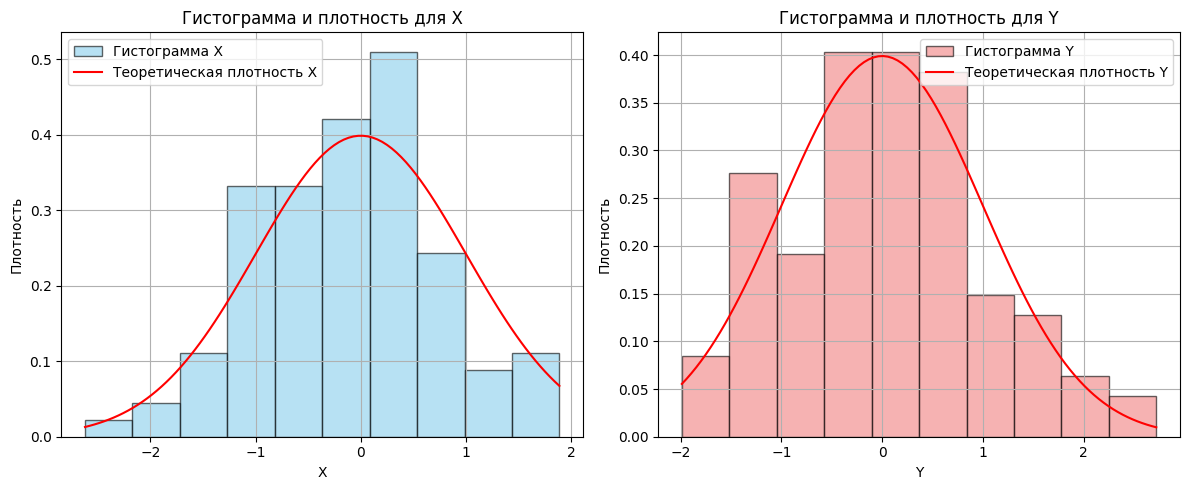

In [12]:
# Задание 2 (1 балл)
# Используйте вспомогательный график, чтобы нарисовать гистограммы с 10 сегментами для каждого измерения
# и построить график плотности вдоль гистограммы для данных из первого задания.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма и плотность для X
ax1.hist(x_coords, bins=10, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Гистограмма X')
# Построим теоретическую плотность нормального распределения для X
x_range = np.linspace(x_coords.min(), x_coords.max(), 100)
ax1.plot(x_range,
         (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_range - mu_x)/sigma)**2),
         color='red', label='Теоретическая плотность X')
ax1.set_xlabel('X')
ax1.set_ylabel('Плотность')
ax1.set_title('Гистограмма и плотность для X')
ax1.legend()
ax1.grid(True)

# Гистограмма и плотность для Y
ax2.hist(y_coords, bins=10, density=True, alpha=0.6, color='lightcoral', edgecolor='black', label='Гистограмма Y')
# Построим теоретическую плотность нормального распределения для Y
y_range = np.linspace(y_coords.min(), y_coords.max(), 100)
ax2.plot(y_range,
         (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((y_range - mu_y)/sigma)**2),
         color='red', label='Теоретическая плотность Y')
ax2.set_xlabel('Y')
ax2.set_ylabel('Плотность')
ax2.set_title('Гистограмма и плотность для Y')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

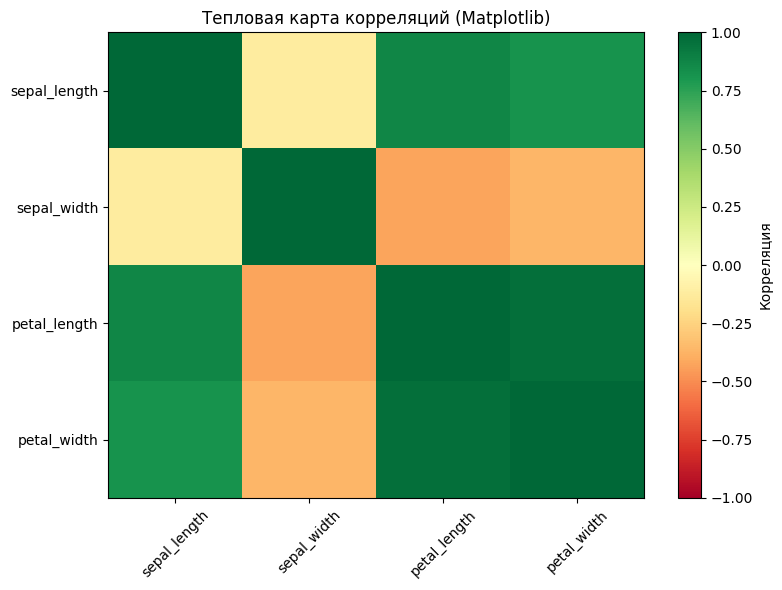

In [13]:
# Задание 3 (2 балла)
# Загрузите набор данных "Ирисы Фишера".
# Создайте тепловую карту с корреляциями между объектами, строки и столбцы которой должны быть подписаны названиями объектов.
# Важно использовать matplotlib.
# Прямая корреляция должна отображаться зеленым цветом, обратная — красным, а отсутствие корреляции — белым.
# Сделайте график достаточно крупным.
# Подсказка: используйте `plt.xticks`, `plt.yticks`, `plt.imshow`, `plt.colorbar`

# Загрузка данных
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = pd.read_csv(url)

# Вычисляем матрицу корреляции между числовыми признаками
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Создаем фигуру
plt.figure(figsize=(8, 6))

# Используем imshow для отображения тепловой карты
im = plt.imshow(corr_matrix, cmap='RdYlGn', vmin=-1, vmax=1, aspect='auto')

# Подписываем оси
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns.tolist(), rotation=45)
plt.yticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns.tolist())

# Добавляем цветовую шкалу
plt.colorbar(im, label='Корреляция')

# Добавляем заголовок
plt.title('Тепловая карта корреляций (Matplotlib)')

# Показываем график
plt.tight_layout()
plt.show()

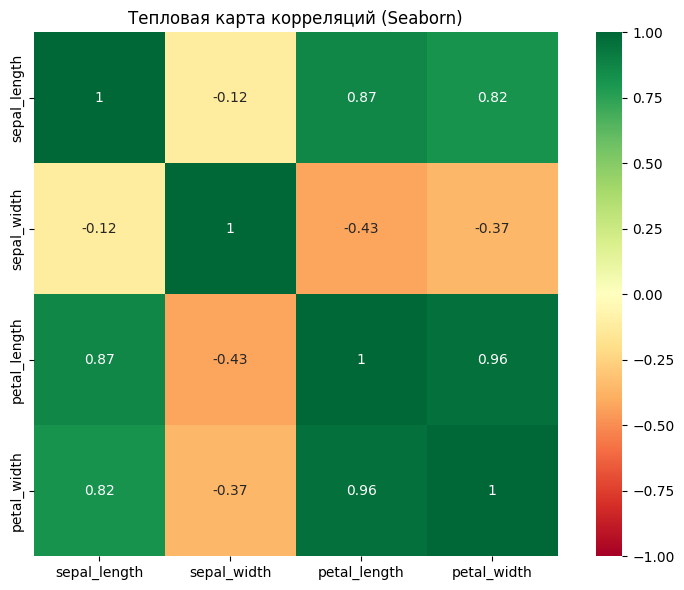

In [14]:
# Задание 4 (1 балл)
# Создайте такую же тепловую карту, используя seaborn.heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, center=0, square=True)
plt.title('Тепловая карта корреляций (Seaborn)')
plt.tight_layout()
plt.show()

# Блок указания источников (если использовались)
1. https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv
2. https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0
3. https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5#%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D1%82%D1%80%D1%91%D1%85_%D1%81%D0%B8%D0%B3%D0%BC